# Import Library

In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Import data set

In [59]:
df: pd.DataFrame = pd.read_excel("./filtered_data.xlsx",sheet_name="All data")
# drop_list=[3,4]+list(range(6,11))+list(range(13,15))
# df=df.drop(labels=drop_list,axis=1)
df.head()


,Unnamed: 0,Gender,3,4,Brand,Type,6,7,8,9,...,Stand.1,Head storage.1,Travel storage.1,Dual Speed.1,Charity.1,Warranty.1,Built-in toothpaste.1,Battery Indicator.1,Attachments.1,Extra head.1
0,Respondent 1,Female,Oral-B rechargeable,NaN,Oral-B,Rechargeable,electric powered,replaceable brush,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,Respondent 2,Female,Name brand manual,NaN,Others,Manual,comfortable handle,cleans teeth well,replaceable brush,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
2,Respondent 3,Male,Manual Generic,NaN,Others,Manual,fairly small,rubberized grip,indicator bristles,battery included,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,Respondent 4,Female,Name brand Manual,NaN,Others,Manual,cleans teeth well,almost same price as regular brush,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Respondent 5,Male,"Oral-B, Manual",NaN,Oral-B,Manual,Cleans teeth well,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0


# 2. Analysis
## 2.1 Oral B vs other brands 
> characteristics rating by brands and brush type

In [60]:
df_character_rate = df.loc[:, 'Grip':'Packaging']
df_character_rate['Brand'] = df.loc[:, 'Brand']
df_character_rate['Type'] = df.loc[:, 'Type']
df_character_rate.head()

,Grip,Weight,On/Off,Clean/Rinse,Vibration,Waterproof,Travel,Replace Battery,Replace Brush Head,$ Replacements,...,Looks Cool,Distinguishable,Match Décor,Easy to Store,Small Space,Easy to hold,Toothbrush Sized,Packaging,Brand,Type
0,4,3,5,5,4,5,5,5,5,5,...,2,3,1,5,3,4,3,1,Oral-B,Rechargeable
1,4,5,5,5,3,5,1,4,4,5,...,2,4,1,4,4,4,5,1,Others,Manual
2,1,3,3,4,5,5,4,4,4,5,...,2,3,1,4,4,3,4,2,Others,Manual
3,4,3,4,5,4,5,4,3,4,5,...,3,5,2,5,4,5,3,2,Others,Manual
4,2,2,3,1,3,4,5,4,2,2,...,2,2,4,2,3,3,1,4,Oral-B,Manual


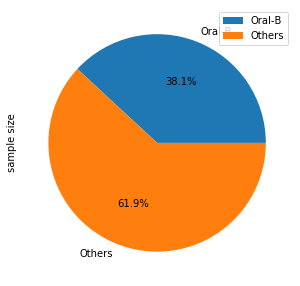

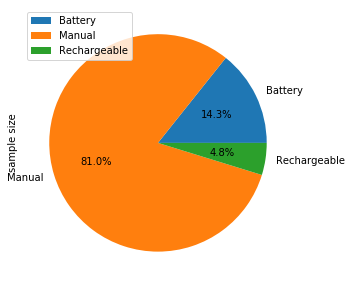

In [61]:
group_brand = df_character_rate.groupby(['Brand'])
group_type = df_character_rate.groupby(['Type'])

size_brand = group_brand.size().to_frame('sample size')
size_type=group_type.size().to_frame('sample size')

plot_brand = size_brand.plot.pie(y='sample size', figsize=(5, 5), autopct='%1.1f%%')
plot_type = size_type.plot.pie(y='sample size', figsize=(5, 5), autopct='%1.1f%%')

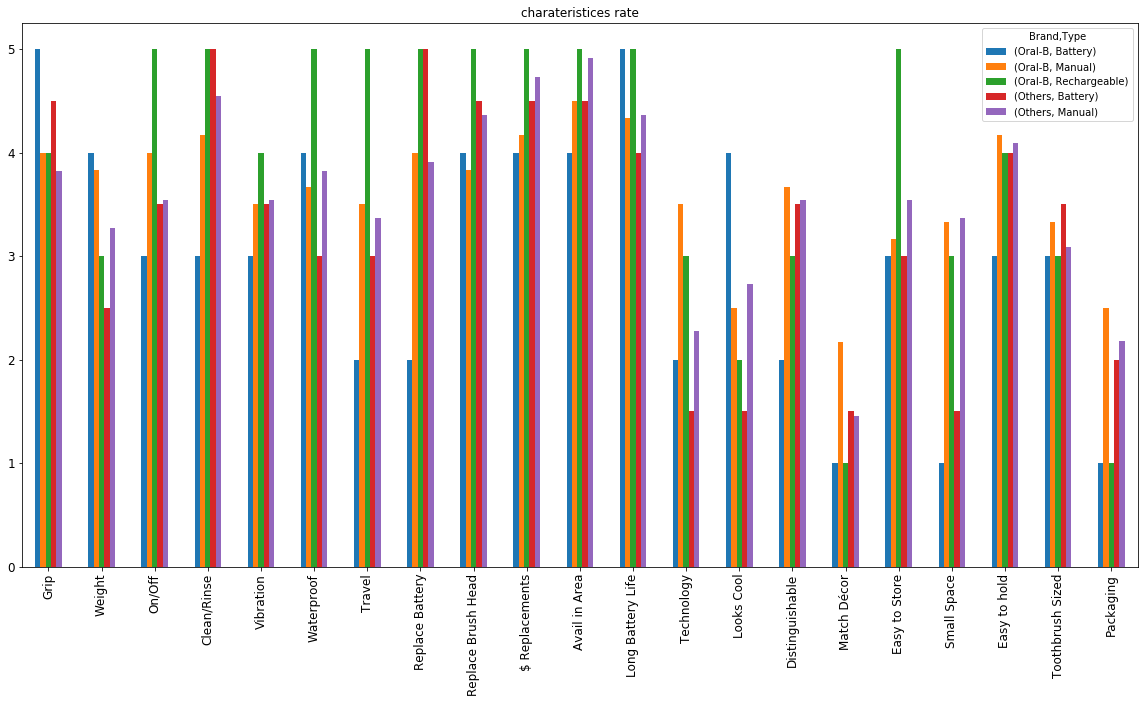

In [62]:
group = df_character_rate.groupby(['Brand', 'Type'])
df_mean_value = group.apply(pd.DataFrame.mean)
ax = df_mean_value.T.plot(kind='bar', title="charateristices rate", figsize=(20, 10), legend=True,
                              fontsize=12)


> Pricing of current product

In [67]:
df_character_rate_drop=df_character_rate.drop(labels=["Brand","Type"],axis=1)
df_character_rate_drop.head()

,Grip,Weight,On/Off,Clean/Rinse,Vibration,Waterproof,Travel,Replace Battery,Replace Brush Head,$ Replacements,...,Long Battery Life,Technology,Looks Cool,Distinguishable,Match Décor,Easy to Store,Small Space,Easy to hold,Toothbrush Sized,Packaging
0,4,3,5,5,4,5,5,5,5,5,...,5,3,2,3,1,5,3,4,3,1
1,4,5,5,5,3,5,1,4,4,5,...,4,2,2,4,1,4,4,4,5,1
2,1,3,3,4,5,5,4,4,4,5,...,5,1,2,3,1,4,4,3,4,2
3,4,3,4,5,4,5,4,3,4,5,...,5,2,3,5,2,5,4,5,3,2
4,2,2,3,1,3,4,5,4,2,2,...,2,2,2,2,4,2,3,3,1,4


Text(0.5, 1, 'Correlation between different fearures')

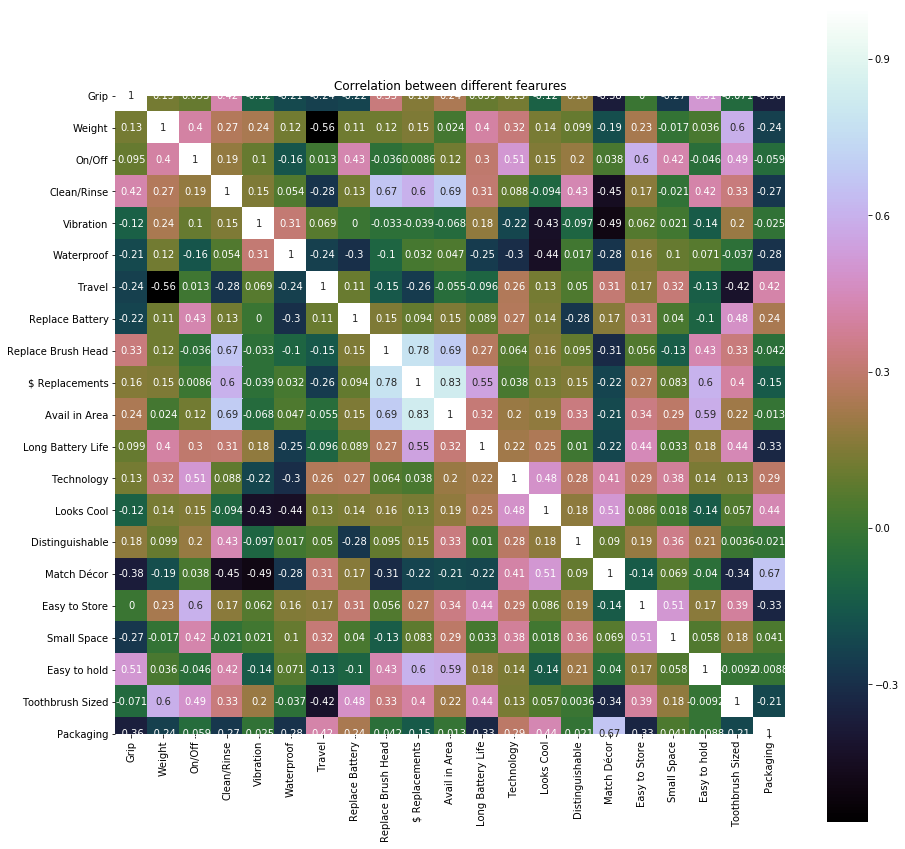

In [71]:
correlation = df_character_rate_drop.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different fearures')